In [7]:
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt 
from datetime import datetime
from datetime import timedelta
from dateutil import tz
import pandas as pd
import numpy as np
import os

In [8]:
def getNewDataFromCSV(currencyPair, startDate, endDate, Input_path = '../input/raw/30sec/'):
    dataframeRead = pd.read_csv(Input_path + "2017-05-01BTC_ETH_USDT2017-11-06" + ".csv", header=[0, 1], index_col=[0])
    
    dataframeReturn = dataframeRead.loc[startDate:endDate]
    
    return dataframeReturn

In [10]:
currencyPair = 'BTC_ETH'

#period = "5min"
#periodInSeconds = 5 * 60  # in seconds

startDate = '2017-05-01-23:00:00'
endDate = '2017-11-01-23:00:00'
#dates = pd.date_range(startDate, endDate, freq=period)

inputDataframe = getNewDataFromCSV(currencyPair, startDate, endDate)
print(inputDataframe.head(6))

                      BTC_ETH             USDT_BTC              USDT_ETH  \
Date                    close      volume    close     volume      close   
2017-05-01-23:00:00  0.053360   11.554615   1524.0   1.420999  81.424992   
2017-05-01-23:00:30  0.053355   85.019051   1524.0   0.302019  81.424992   
2017-05-01-23:01:00  0.053461  248.282030   1524.0   2.421500  81.424992   
2017-05-01-23:01:30  0.053310  341.413107   1528.0   4.883394  81.424992   
2017-05-01-23:02:00  0.053331   17.503891   1523.0   0.591370  81.424992   
2017-05-01-23:02:30  0.053222  674.733659   1523.0  14.310891  81.424992   

                                
Date                    volume  
2017-05-01-23:00:00   1.228124  
2017-05-01-23:00:30  50.669806  
2017-05-01-23:01:00   0.000000  
2017-05-01-23:01:30   0.000000  
2017-05-01-23:02:00   0.253418  
2017-05-01-23:02:30   0.028185  


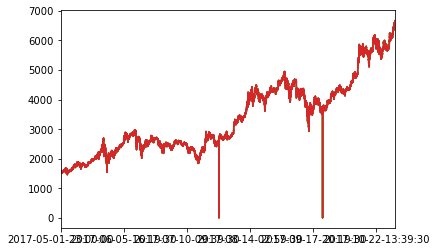

In [17]:
inputDataframe.USDT_BTC.close.plot()
plt.show()

/Users/lorenzo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app
/Users/lorenzo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


                      BTC_ETH                 USDT_BTC             USDT_ETH  \
Date                    close      volume        close    volume      close   
2017-05-01-23:34:30  0.052855    1.333188  1530.000010  0.099117  81.161520   
2017-05-01-23:35:00  0.052855   24.960214  1530.744016  0.000583  81.161520   
2017-05-01-23:35:30  0.052949  341.614647  1530.744016  0.000873  81.161520   
2017-05-01-23:36:00  0.052879   50.641380  1530.744016  0.481326  81.504486   
2017-05-01-23:36:30  0.052874   57.942345  1531.000000  0.433028  81.504486   
2017-05-01-23:37:00  0.052840  433.147348  1531.000000  3.709523  81.161520   

                                    USDT_BTC                            \
Date                     volume rolling_mean rolling_std rolling_std_p   
2017-05-01-23:34:30    2.076517  1530.739657    1.091663   1532.922983   
2017-05-01-23:35:00    8.746468  1530.814059    1.060562   1532.935182   
2017-05-01-23:35:30  117.507159  1530.888461    1.022523   1532.933506 

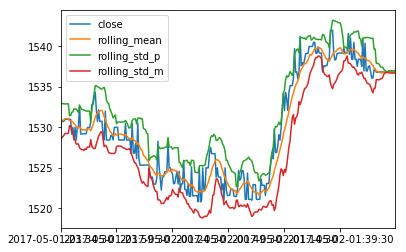

In [45]:
window = 10
rolling_mean = pd.rolling_mean(inputDataframe.USDT_BTC.close, window = window)
rolling_mean.dropna(axis=0, how='any',inplace=True)

rolling_std = pd.rolling_std(inputDataframe.USDT_BTC.close, window = window)
rolling_std.dropna(axis=0, how='any',inplace=True)

#print(type(rolling_mean))
#print(rolling_mean.head())

std_n = 2
inputDataframe['USDT_BTC', 'rolling_mean'] = rolling_mean
inputDataframe['USDT_BTC', 'rolling_std'] = rolling_std
inputDataframe['USDT_BTC', 'rolling_std_p'] = rolling_mean + std_n *  rolling_std 
inputDataframe['USDT_BTC', 'rolling_std_m'] = rolling_mean - std_n * rolling_std 
inputDataframe.dropna(axis=0, how='any',inplace=True)
print(inputDataframe.head(6))

inputDataframe.USDT_BTC.close.head(300).plot()
inputDataframe.USDT_BTC.rolling_mean.head(300).plot()
inputDataframe.USDT_BTC.rolling_std_p.head(300).plot()
inputDataframe.USDT_BTC.rolling_std_m.head(300).plot()
plt.legend()
plt.show()